In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from linearRegression import LinearRegression

In [2]:
duong_dan = 'car_detail_cleaned.csv'

In [3]:
df = pd.read_csv(duong_dan)

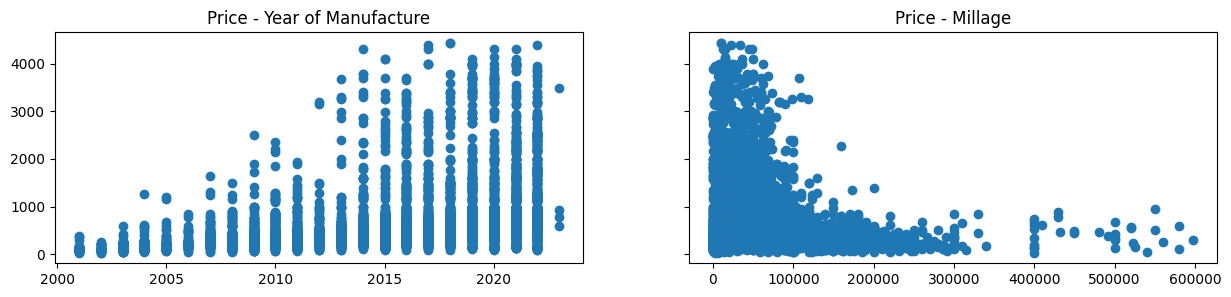

In [4]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(df['year_of_manufacture'],df['Price'])
ax1.set_title('Price - Year of Manufacture')
ax2.scatter(df['mileage'],df['Price'])
ax2.set_title('Price - Millage')
plt.show()

In [5]:
log_price = np.log(df['Price'])
df['log_price'] = log_price
df

,origin,car_model,mileage,exterior_color,interior_color,num_of_doors,seating_capacity,engine,transmission,drive_type,fuel_consumption,grade,year_of_manufacture,car_name,Price,log_price
0,Domestic assembly,Crossover,62000.0,Sand,gray,5,8,Petrol\t2.0 L,Manual,RFD - Rear-wheel drive,7\tL/100Km,Innova,2016.0,Toyota Innova 2.0E 2016 car,368.0,5.908083
1,Imported,SUV,83000.0,White,Black,5,5,Petrol\t2.0 L,Automatic,FWD - Front-wheel drive,7\tL/100Km,CRV,2011.0,Honda CRV 2.0 AT 2011,438.0,6.082219
2,Imported,Van/Minivan,150000.0,Silver,-,4,16,Petrol\t2.7 L,Manual,RFD - Rear-wheel drive,9\tL/100Km,Hiace,2015.0,Toyota Hiace 2.7 2015,540.0,6.291569
3,Imported,Bán tải / Pickup,60000.0,Black,Cream,4,5,Diesel\t2.8 L,Automatic,4WD - Four-wheel drive (4WD),7\tL/100Km,Colorado,2015.0,Chevrolet Colorado LTZ 2.8L 4x4 AT 2015,479.0,6.171701
4,Imported,Sedan,170000.0,Black,Cream,4,5,Petrol\t3.5 L,Automatic,AWD - 4-wheel drive (AWD),11\tL/100Km,GS,2009.0,Lexus GS 350 AWD 2009,760.0,6.633318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,Imported,SUV,9.0,Black,Black,5,8,Diesel,Automatic,4WD - Four-wheel drive (4WD),6\tL/100Km,Rexton,2006.0,Ssangyong Rexton 2.5 2006,195.0,5.273000
8247,Domestic assembly,Crossover,75000.0,White,Grey,5,5,Petrol,Automatic,FWD - Front-wheel drive,7\tL/100Km,EcoSport,2016.0,Ford EcoSport Titanium 2016,415.0,6.028279
8248,Domestic assembly,Sedan,21000.0,Copper,Cream,4,5,Petrol,Automatic,FWD - Front-wheel drive,6\tL/100Km,Vios,2018.0,Toyota Vios 1.5G 2018,430.0,6.063785
8249,Domestic assembly,SUV,38000.0,White,Black,5,5,Petrol,Automatic,FWD - Front-wheel drive,6\tL/100Km,i10,2021.0,Hyundai i10 1.2 AT 2021 car,395.0,5.978886


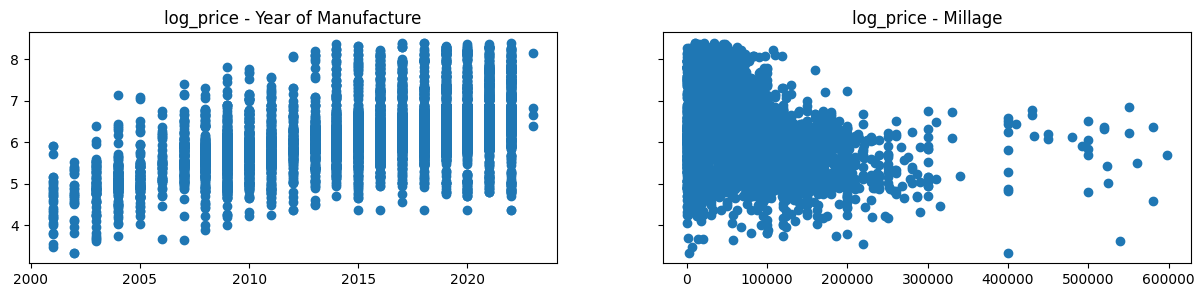

In [6]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(df['year_of_manufacture'],df['log_price'])
ax1.set_title('log_price - Year of Manufacture')
ax2.scatter(df['mileage'],df['log_price'])
ax2.set_title('log_price - Millage')
plt.show()

In [7]:
from sklearn.preprocessing import TargetEncoder
df_to_encode = df
target_encoder = TargetEncoder()
categorical_cols = [
    'origin', 'car_model', 'exterior_color', 'interior_color',
    'num_of_doors', 'seating_capacity', 'engine', 'transmission',
    'drive_type','grade', 'fuel_consumption', 'car_name'
]
df_to_encode[categorical_cols] = target_encoder.fit_transform(df_to_encode[categorical_cols], df_to_encode['log_price'])

# Rename the encoded columns to have a suffix like '_target_encoded' for clarity
encoded_col_names = {col: col + '_target_encoded' for col in categorical_cols if col in df_to_encode.columns}
df_to_encode = df_to_encode.rename(columns=encoded_col_names)

In [8]:
df_to_encode

,origin_target_encoded,car_model_target_encoded,mileage,exterior_color_target_encoded,interior_color_target_encoded,num_of_doors_target_encoded,seating_capacity_target_encoded,engine_target_encoded,transmission_target_encoded,drive_type_target_encoded,fuel_consumption_target_encoded,grade_target_encoded,year_of_manufacture,car_name_target_encoded,Price,log_price
0,6.124767,6.213619,62000.0,5.986530,5.763343,6.236065,6.051198,6.497164,5.594932,6.316787,6.222507,6.019444,2016.0,6.003060,368.0,5.908083
1,6.313535,6.495762,83000.0,6.309402,6.260804,6.236065,6.187702,6.497164,6.350322,6.023037,6.222507,6.502281,2011.0,5.986452,438.0,6.082219
2,6.307195,5.779395,150000.0,5.806132,5.841560,6.162536,5.746055,6.549141,5.591062,6.320771,6.305088,5.140880,2015.0,6.197838,540.0,6.291569
3,6.313535,6.258994,60000.0,6.310709,6.234271,6.160792,6.187702,6.497844,6.350322,6.269918,6.222507,6.213683,2015.0,6.098074,479.0,6.171701
4,6.315956,6.149343,170000.0,6.308701,6.233954,6.159357,6.190517,6.921983,6.353894,7.048068,6.465059,6.572900,2009.0,6.549651,760.0,6.633318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,6.315872,6.501765,9.0,6.305301,6.275401,6.235236,6.031300,5.954262,6.355072,6.265326,6.081667,6.198488,2006.0,6.198488,195.0,5.273000
8247,6.124767,6.213619,75000.0,6.309402,5.877339,6.236065,6.187702,6.155474,6.350322,6.023037,6.222507,6.093190,2016.0,6.197996,415.0,6.028279
8248,6.128632,6.145761,21000.0,6.270148,6.232378,6.162536,6.185563,6.138940,6.350921,6.023450,6.079074,5.931409,2018.0,6.131936,430.0,6.063785
8249,6.115908,6.497604,38000.0,6.295657,6.280102,6.231486,6.171537,6.143095,6.349009,6.009983,6.077930,5.754412,2021.0,6.030550,395.0,5.978886


In [9]:
df_to_encode.sample(10).T

,1029,112,5223,1792,5173,5401,4677,6623,3674,5869
origin_target_encoded,6.124268,6.127326,6.315956,6.124767,6.315956,6.315872,6.124767,6.310182,6.124767,6.313535
car_model_target_encoded,6.149343,6.501765,6.263089,5.676357,6.263089,6.501765,6.213619,6.130016,6.147746,5.676357
mileage,10000.000000,60000.000000,38000.000000,81000.000000,160000.000000,20000.000000,16000.000000,260000.000000,141000.000000,100000.000000
exterior_color_target_encoded,6.085325,6.313492,6.310815,6.309402,5.824110,6.313492,6.310709,5.808863,5.829762,6.111475
interior_color_target_encoded,6.286758,5.847738,6.140763,6.260804,6.286758,6.275401,6.260804,5.757686,6.234271,5.900586
num_of_doors_target_encoded,6.159357,6.235236,6.159357,6.236065,6.159357,6.235236,6.236065,6.147227,6.160792,6.236065
seating_capacity_target_encoded,6.190517,6.189915,6.190517,6.187702,6.190517,6.422342,6.187702,6.171537,6.187702,6.187702
engine_target_encoded,6.524424,6.157589,6.486915,6.497164,6.390424,6.495809,5.933271,6.010212,6.158291,5.449102
transmission_target_encoded,6.353894,6.355072,6.353894,6.350322,6.353894,6.355072,6.350322,5.578169,5.594932,6.350322
drive_type_target_encoded,6.332419,6.024091,6.259438,6.023037,6.259438,6.321207,6.023037,6.009983,6.023037,6.023037


In [10]:
df_to_encode.columns

Index(['origin_target_encoded', 'car_model_target_encoded', 'mileage',
       'exterior_color_target_encoded', 'interior_color_target_encoded',
       'num_of_doors_target_encoded', 'seating_capacity_target_encoded',
       'engine_target_encoded', 'transmission_target_encoded',
       'drive_type_target_encoded', 'fuel_consumption_target_encoded',
       'grade_target_encoded', 'year_of_manufacture',
       'car_name_target_encoded', 'Price', 'log_price'],
      dtype='object')

In [11]:
df_to_encode.isnull().sum()


origin_target_encoded              0
car_model_target_encoded           0
mileage                            0
exterior_color_target_encoded      0
interior_color_target_encoded      0
num_of_doors_target_encoded        0
seating_capacity_target_encoded    0
engine_target_encoded              0
transmission_target_encoded        0
drive_type_target_encoded          0
fuel_consumption_target_encoded    0
grade_target_encoded               0
year_of_manufacture                0
car_name_target_encoded            0
Price                              0
log_price                          0
dtype: int64

In [12]:
df_to_encode.to_csv('dataset.csv', index=False)  